# First Demo

This Demo will showcase the feature estimation and examplar analysis using simulated data.

## Import


In [1]:
import py_neuromodulation as py_nm

from py_neuromodulation import (
    nm_analysis,
    nm_decode,
    nm_define_nmchannels,
    
)
import numpy as np
from matplotlib import pyplot as plt

## Data Simulation

We will now generate some example data of 5 seconds, for 6 channels with a sample rate of 1kHz. 

In [2]:
def generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES):
    # from https://towardsdatascience.com/random-walks-with-python-8420981bc4bc
    dims = NUM_CHANNELS
    step_n = TIME_DATA_SAMPLES-1
    step_set = [-1, 0, 1]
    origin = (np.random.random([1,dims])-0.5)*1 # Simulate steps in 1D
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    return path.T

In [3]:
NUM_CHANNELS = 6
sfreq = 1000
TIME_DATA_SAMPLES = 5 * sfreq
data = generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES)
time = np.arange(0, TIME_DATA_SAMPLES/sfreq, 1/sfreq)

Text(0.5, 1.0, 'Example random walk data')

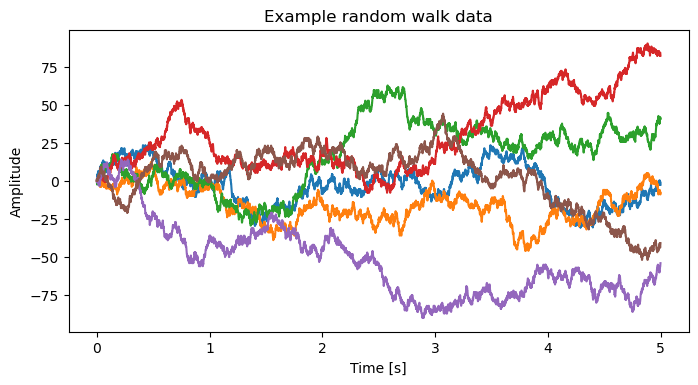

In [4]:
plt.figure(figsize=(8,4), dpi=100)
for ch_idx in range(data.shape[0]):
    plt.plot(time, data[ch_idx, :])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Example random walk data")

Now let's define the necessary setup files will be use for data preprocessing and feature estimation. 
Py_neuromodualtion is based on two parametrization files: the *nm_channels.tsv* and the *nm_setting.json*.

### nm_channels

The *nm_channel* dataframe. This dataframe contains the columns

| Column name | Description |
| --- | --- | 
|**name** | name of the channel
|**rereference** | different channel name for bipolar rereferencing, or avereage for commono average rereferencing
|**used** | 0 or 1, channel selection 
|**target** | 0 or 1, for some decoding applications we can define target chanenls, e.g. EMG channels
|**type** | channel type according to the mne-python toolbox (https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html#sphx-glr-auto-tutorials-raw-10-raw-overview-py), e.g. ecog, eeg, ecg, emg, dbs, seeg etc.  
|**status** | good or bad, used for channel quality indication
|**new_name** | this keyword can be specified to indicate for example the used rereferncing scheme

The nm_stream can either created as a *.tsv* text file, or as a pandas dataframe. There are some helper function that let you create the nm_channels without much effort: 

In [5]:
nm_channels = nm_define_nmchannels.get_default_channels_from_data(data, car_rereferencing=True)

nm_channels

,name,rereference,used,target,type,status,new_name
0,ch0,average,1,0,ecog,good,ch0-avgref
1,ch1,average,1,0,ecog,good,ch1-avgref
2,ch2,average,1,0,ecog,good,ch2-avgref
3,ch3,average,1,0,ecog,good,ch3-avgref
4,ch4,average,1,0,ecog,good,ch4-avgref
5,ch5,average,1,0,ecog,good,ch5-avgref


Using this function default channel names and a common average rereference scheme is specified. Alternatively the *nm_define_nmchannels.set_channels* function can be used to pass each column values.

### nm_settings

Next, we will initialize the nm_settings dictionary and use the default settings, reset them, and enable a subset of features:

In [6]:
settings = py_nm.nm_settings.get_default_settings()
settings = py_nm.nm_settings.reset_settings(settings)
settings

{'sampling_rate_features_hz': 10,
 'segment_length_features_ms': 1000,
 'preprocessing': [],
 'documentation_preprocessing_options': ['raw_resampling',
  'notch_filter',
  're_referencing',
  'raw_normalization'],
 'features': {'raw_hjorth': False,
  'return_raw': False,
  'bandpass_filter': False,
  'stft': False,
  'fft': False,
  'sharpwave_analysis': False,
  'coherence': False,
  'fooof': False,
  'nolds': False,
  'bursts': False,
  'linelength': False,
  'mne_connectivity': False},
 'postprocessing': {'feature_normalization': False,
  'project_cortex': False,
  'project_subcortex': False},
 'raw_resampling_settings': {'resample_freq_hz': 1000},
 'documentation_normalization_options': ['mean',
  'median',
  'zscore',
  'zscore-median',
  'quantile',
  'power',
  'robust',
  'minmax'],
 'raw_normalization_settings': {'normalization_time_s': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time_s': 30,
  'normalization_method'

The settings itself is a .json file which contains the parametrization for processing, feature estimation, postprocessing and definition which which sampling sampling rate features are being calculated. In this example 'sampling_rate_features_hz' is specified to be 10 Hz, so every 100ms a new set of features is calculated.

For many features the 'segment_length_features_ms' specifies the time dimension of the raw signal being used for feature calculation. Here it is specified to be 1000 ms.

We will now enable the features:

* fft
* bursts
* sharpwave

and stay with the default preprcessing methods:

* notch_filter
* re_referencing

and use *z-score* postprocessing normalization.

In [7]:
settings["features"]["fft"] = True
settings["features"]["bursts"] = True
settings["features"]["sharpwave_analysis"] = True

We are now ready to go to instantiate the *Stream* and call the *run* method for feature estimation:

In [21]:
stream = py_nm.Stream(
    settings=settings,
    nm_channels=nm_channels,
    verbose=True,
    sfreq=sfreq,
    line_noise=50
)

stream.run(data)

Last batch took: 0.15 seconds
1.0 seconds of data processed
Last batch took: 0.14 seconds
1.1 seconds of data processed
Last batch took: 0.13 seconds
1.2 seconds of data processed
Last batch took: 0.1 seconds
1.3 seconds of data processed
Last batch took: 0.11 seconds
1.4 seconds of data processed
Last batch took: 0.11 seconds
1.5 seconds of data processed
Last batch took: 0.15 seconds
1.6 seconds of data processed
Last batch took: 0.14 seconds
1.7 seconds of data processed
Last batch took: 0.15 seconds
1.8 seconds of data processed
Last batch took: 0.11 seconds
1.9 seconds of data processed
Last batch took: 0.14 seconds
2.0 seconds of data processed
Last batch took: 0.13 seconds
2.1 seconds of data processed
Last batch took: 0.13 seconds
2.2 seconds of data processed
Last batch took: 0.15 seconds
2.3 seconds of data processed
Last batch took: 0.14 seconds
2.4 seconds of data processed
Last batch took: 0.12 seconds
2.5 seconds of data processed
Last batch took: 0.15 seconds
2.6 seconds

### Feature Analysis

Ok, so there is a lot of output, which we could omit by verbose beinng False, but let's have a look what was being computed. We will therefore use the nm_analysis class to showcase some functions. For multi-run or subject analyze we will pass here the feature_file "sub" default directory:

In [8]:
analyzer = nm_analysis.Feature_Reader(
    feature_dir=r"c:\code\py_neuromodulation\sphinx", feature_file="sub"
)

Let's have a look at the resulting dataframe, lying in the "feature_arr" dataframe: 

In [36]:
analyzer.feature_arr.iloc[:10, :]

,ch0-avgref_fft_theta,ch0-avgref_fft_alpha,ch0-avgref_fft_low beta,ch0-avgref_fft_high beta,ch0-avgref_fft_low gamma,ch0-avgref_fft_high gamma,ch0-avgref_fft_HFA,ch1-avgref_fft_theta,ch1-avgref_fft_alpha,ch1-avgref_fft_low beta,...,ch5-avgref_bursts_high beta_amplitude_max,ch5-avgref_bursts_high beta_burst_rate_per_s,ch5-avgref_bursts_high beta_in_burst,ch5-avgref_bursts_low gamma_duration_mean,ch5-avgref_bursts_low gamma_amplitude_mean,ch5-avgref_bursts_low gamma_duration_max,ch5-avgref_bursts_low gamma_amplitude_max,ch5-avgref_bursts_low gamma_burst_rate_per_s,ch5-avgref_bursts_low gamma_in_burst,time
0,6.089898,5.617158,5.308378,4.958953,4.263829,3.227591,2.697614,6.150854,5.341897,5.685462,...,3.731859,0.010870,0.0,0.004545,0.548320,0.006,1.580092,0.004545,0.0,1000.0
1,6.252210,5.894600,5.301404,4.760579,4.237574,3.254331,2.699028,5.758539,5.239255,5.810728,...,3.539007,0.011591,0.0,0.004648,0.565130,0.007,2.461987,0.004648,0.0,1100.0
2,6.402965,5.769921,5.343118,4.821998,4.240515,3.296568,2.703686,6.055070,6.008219,5.793377,...,5.790256,0.012500,0.0,0.004382,0.528986,0.007,2.524153,0.004382,1.0,1200.0
3,6.446717,5.787001,5.372686,4.772758,4.210562,3.246058,2.711096,6.530080,5.965136,5.646274,...,3.052300,0.012348,1.0,0.004358,0.529900,0.007,2.821637,0.004358,1.0,1300.0
4,6.276360,6.174573,5.464597,4.988389,4.170108,3.340520,2.799797,6.286473,6.017818,5.722887,...,5.325782,0.012952,0.0,0.004472,0.526168,0.007,1.987342,0.004472,1.0,1400.0
5,6.466796,6.195512,5.313164,4.783673,4.089992,3.314670,2.693059,6.425569,5.934401,5.401781,...,5.157046,0.011818,0.0,0.004611,0.523627,0.008,2.354628,0.004611,1.0,1500.0
6,6.916481,6.125152,5.908067,5.260490,4.567866,3.732745,3.056493,6.538845,5.958671,5.516255,...,9.672318,0.013429,0.0,0.004604,0.601223,0.007,3.468349,0.004604,1.0,1600.0
7,6.969991,6.323205,5.662504,4.912039,4.510903,3.681688,3.064612,6.674937,5.990793,5.392715,...,7.232739,0.013545,0.0,0.004491,0.561514,0.007,2.596098,0.004491,1.0,1700.0
8,7.122556,6.344314,5.674248,4.893033,4.364879,3.548725,2.851100,6.914323,6.012528,5.446741,...,5.055171,0.012571,0.0,0.004312,0.522334,0.007,2.908995,0.004312,1.0,1800.0
9,6.799669,6.105915,5.341065,4.826189,4.260968,3.387736,2.736002,6.458858,6.371584,5.425457,...,4.625176,0.011667,0.0,0.004571,0.524971,0.007,2.557202,0.004571,1.0,1900.0


Seems like a lot of features were calculated. The 'time' columns tells us about each row time index. For the 6 specified channels, it is each 31 features. We can now use some in-built plotting functions for visualization.

Note: Due to the simulation data, some of the features have constant values, which are not displayed throught the image normalization.

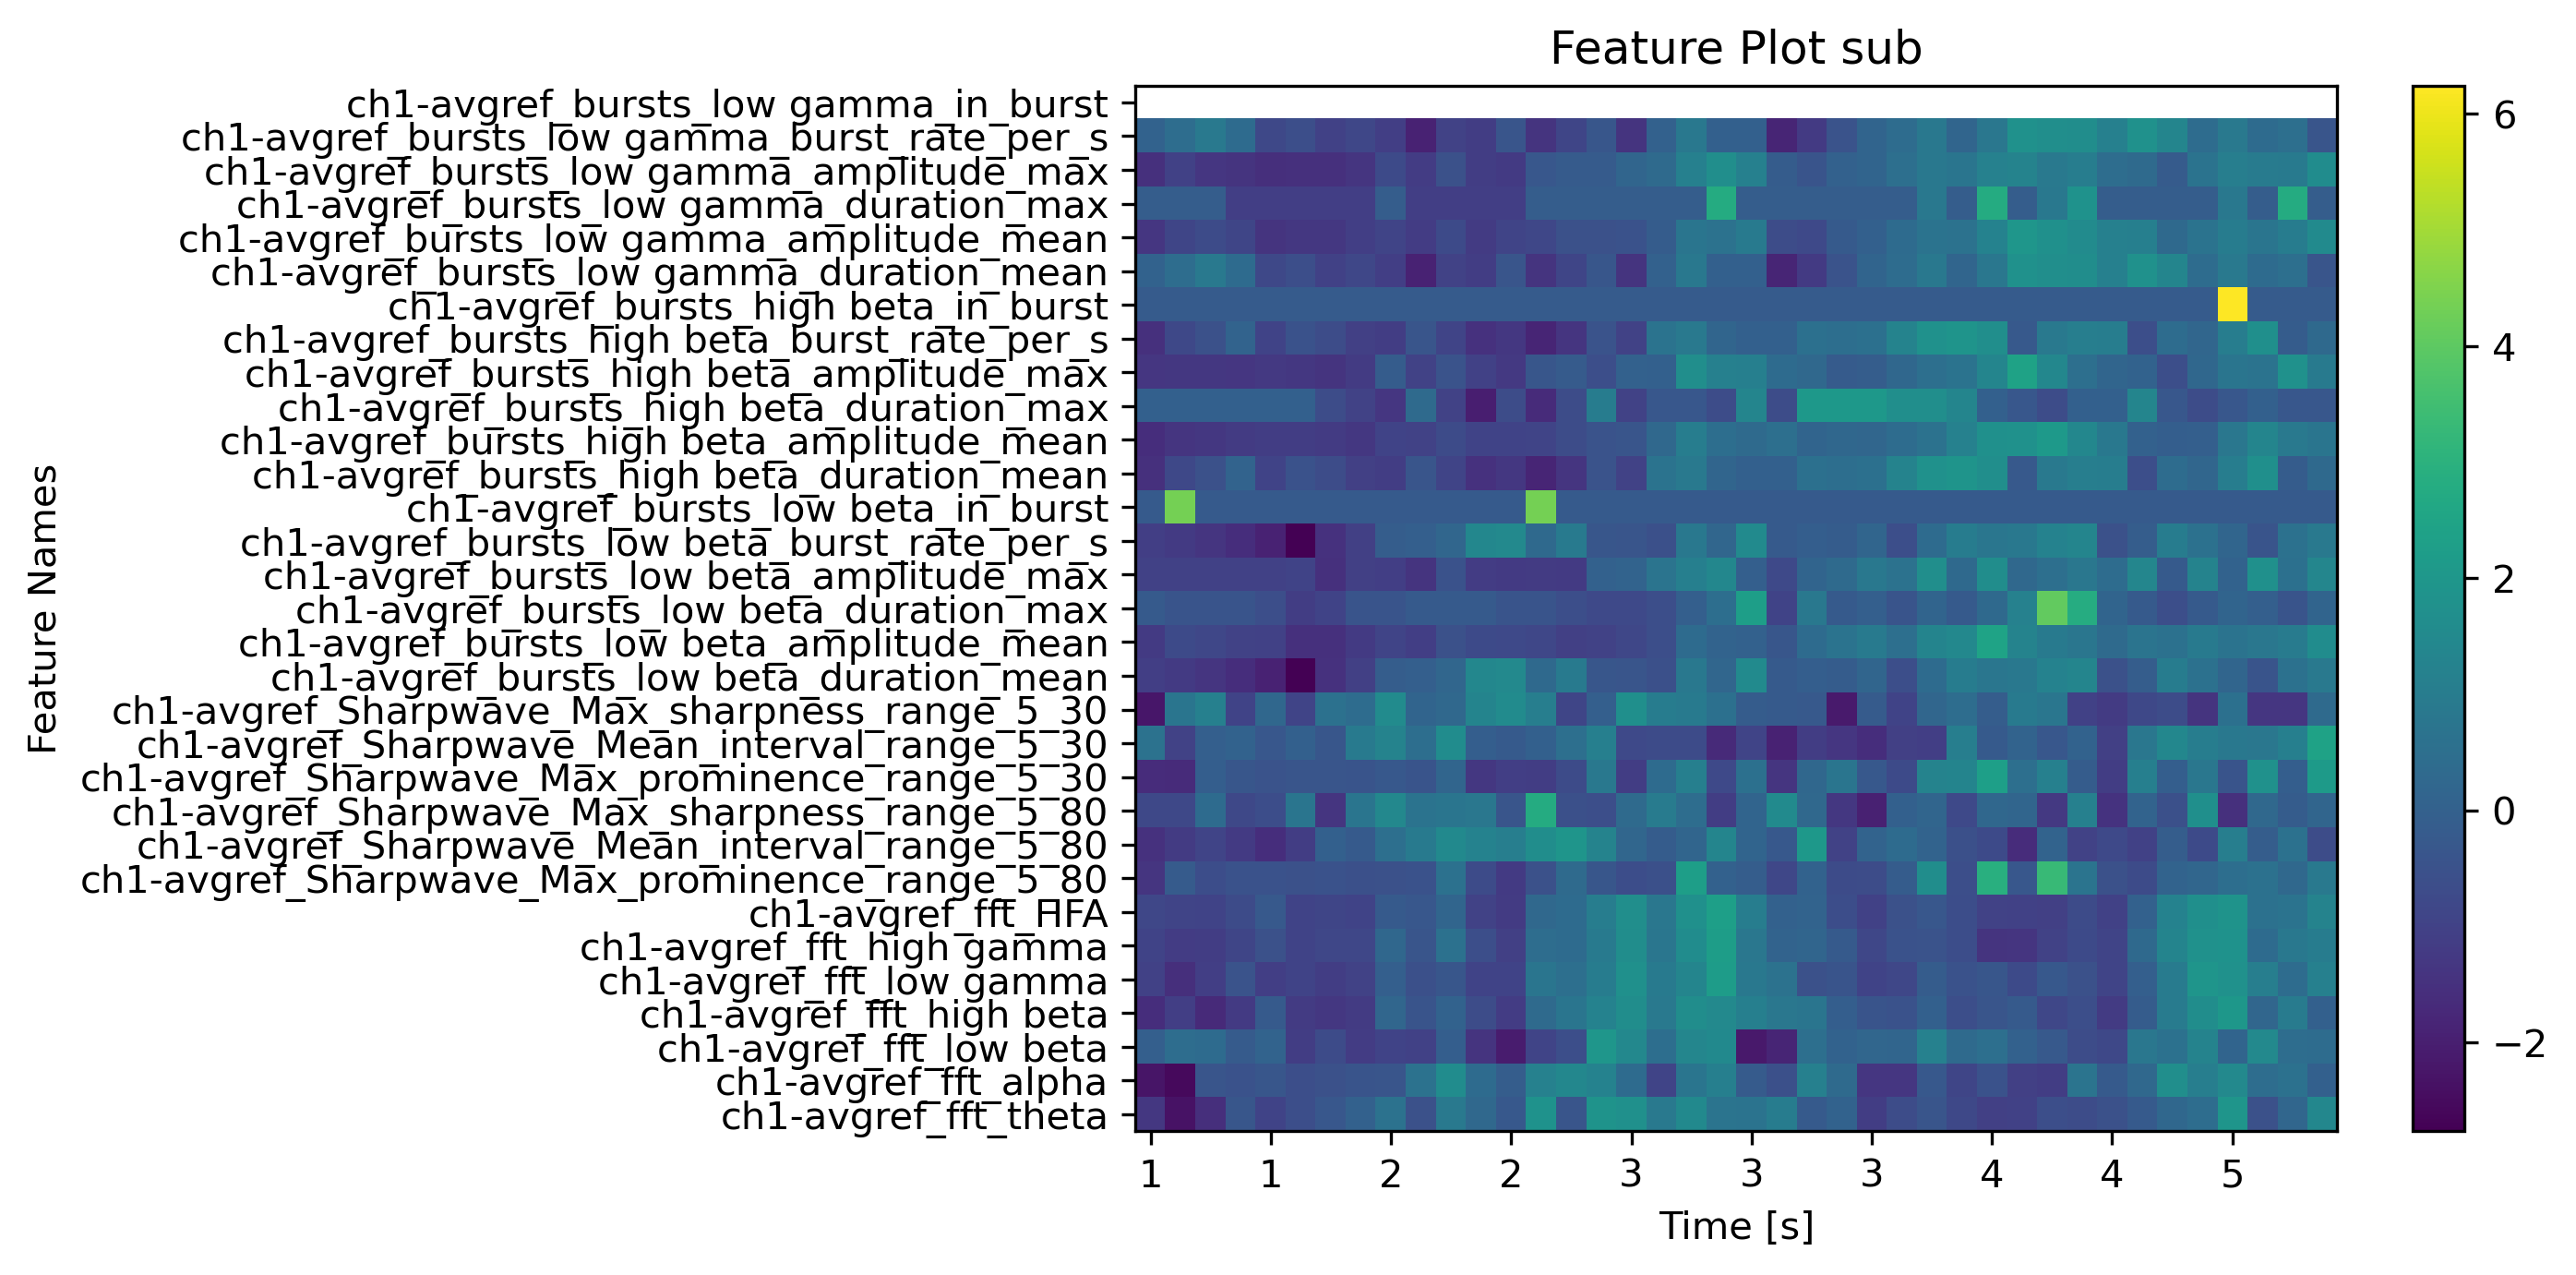

In [37]:
analyzer.plot_all_features(ch_used="ch1")

Text(41.093749999999986, 0.5, 'Features')

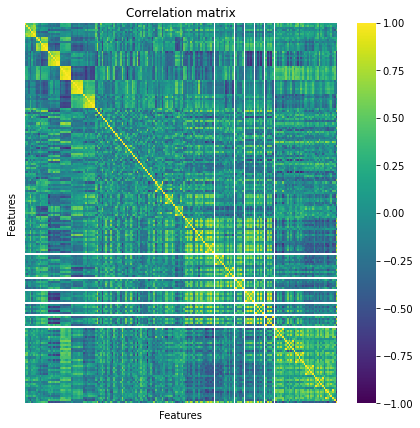

In [38]:
ax = analyzer.plot_corr_matrix()
ax.set_xlabel("Features")
ax.set_ylabel("Features")

The upper correlation matrix shows the correlation of every feature of every channel to every other.
This notebook demonstrated a first demo how features can quickly be generated. For further feature modalities and decoding applications check out the next notebooks.